In [6]:
"""
author: Dominik Cedro
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline


In [7]:
df= pd.read_csv('polynomial-regression.csv')
X = df.drop(columns=['araba_max_hiz'])
y = df['araba_max_hiz']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
polynomial_features = PolynomialFeatures(degree=4)
X_train_poly = polynomial_features.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_poly, y_train)
X_test_poly = polynomial_features.transform(X_test)
y_pred = model.predict(X_test_poly)

X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)


In [8]:
X_range_df = pd.DataFrame(X_range, columns=['araba_fiyat'])
X_range_poly = polynomial_features.transform(X_range_df)
y_range_pred = model.predict(X_range_poly)
y_pred = model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}, R²: {r2}')

MSE: 440.84084429818546, R²: 0.9353816352005917


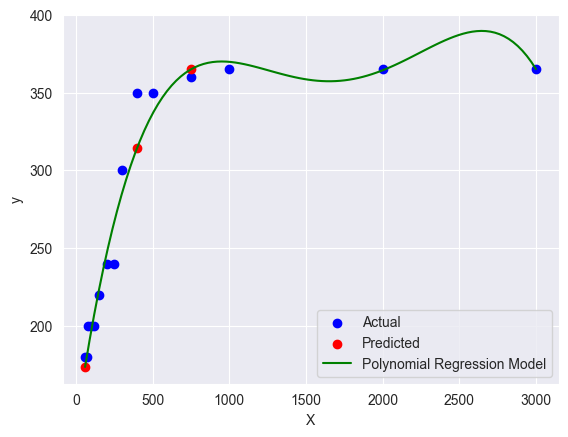

In [9]:
plt.scatter(X, y, color='blue', label='Actual')  # Gerçek değerler
plt.scatter(X_test, y_pred, color='red', label='Predicted')  # Tahmin edilen değerler
plt.plot(X_range, y_range_pred, color='green', label='Polynomial Regression Model')  # Polinom eğrisi
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()